# Protein classification analysis (SQANTI protein)

Generates statistics of abundance and number of isoforms found by protein classification.

Plots of number of isoforms found by protein classification.


In [1]:
from huvec_analysis import huvec_config
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import matplotlib
matplotlib.rc('font', **huvec_config.font)

# all plots go into a directory
if not os.path.exists('plot'):
    os.makedirs('plot')

# all statistics go into a directory
if not os.path.exists('stats'):
    os.makedirs('stats')


In [2]:

unfiltered_database_file = f'{huvec_config.PIPELINE_RESULTS_DIRECTORY}/protein_classification/huvec_unfiltered.protein_classification.tsv' #~46K
filtered_database_file = f'{huvec_config.PIPELINE_RESULTS_DIRECTORY}/protein_filter/huvec.classification_filtered.tsv' # ~34K 
pclassification_file = f'{huvec_config.PIPELINE_RESULTS_DIRECTORY}/protein_classification/huvec_unfiltered.protein_classification.tsv'
huvec_gene_file = f'{huvec_config.PIPELINE_RESULTS_DIRECTORY}/protein_classification/huvec_genes.tsv'
pclass_all = pd.read_table(pclassification_file)

unfiltered_db = pd.read_table(unfiltered_database_file)
prots = pd.read_table(filtered_database_file)
prots['gene'] = prots['pr_gene']
genes = pd.read_table(huvec_gene_file)

structural_sizes = prots.groupby('pclass').size()
total = len(pclass_all)
# total = structural_sizes.sum()
structural_percent = structural_sizes / total * 100
structural_category_stats = pd.merge(structural_sizes.reset_index(), structural_percent.reset_index(), on = 'pclass')
structural_category_stats.columns = ['structural_category', 'N', 'percent']


### Plot number of isoforms found by protein classification

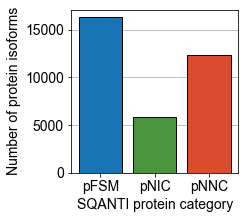

<Figure size 432x288 with 0 Axes>

In [3]:

# output bar plot of sqanti categories
fig, ax = plt.subplots(figsize=(3,3))
struc_simple= structural_category_stats[structural_category_stats.structural_category.isin(['pFSM','pNIC', 'pNNC'])]
colors = []
for cat in struc_simple['structural_category']:
    colors.append(huvec_config.sqanti_protein_colors[cat])
ax.bar(struc_simple.structural_category, struc_simple.N, edgecolor='black', linewidth=1, color=colors, zorder=20)
ax.grid(axis='y', zorder=0)
ax.set_xlabel('SQANTI protein category')
ax.set_ylabel('Number of protein isoforms')
plt.savefig('plot/bar_sqanti_cats_all.pdf', bbox_inches='tight')
plt.show()
plt.clf()


In [4]:

# output source data
struc_simple.columns = ['protein_structural_category', 'N', 'percent']
structural_category_stats.to_csv('stats/protein_sqanti_cats_all.tsv', sep='\t', index=None)


### Generate statistics of isoforms broken down by protein classification

In [5]:

#find the individual numbers of each categorey 
# for the unfiltered database
unfiltered_size = unfiltered_db.groupby('protein_classification_base').size()
total = len(unfiltered_db)
unfiltered_db_percent = unfiltered_size/ total * 100
unfiltered_cats_stats = pd.merge(unfiltered_size.reset_index(), unfiltered_db_percent.reset_index(), on= 'protein_classification_base')
unfiltered_cats_stats.columns = ['p_cat', 'N', 'percent']
unfiltered_cats_stats.to_csv('stats/unfiltered_db_size.tsv', sep = '\t', index= None)

pFSM = unfiltered_db[unfiltered_db['protein_classification_base'] == 'pFSM']
pNIC = unfiltered_db[unfiltered_db['protein_classification_base'] =='pNIC']
pNNC = unfiltered_db[unfiltered_db['protein_classification_base'] =='pNNC']
pFSM = unfiltered_db[unfiltered_db['protein_classification_base'] =='pFSM']
novel_cats = pNIC + pNNC
total = len(unfiltered_db)
# get the perentages 
pFSM_percentage = len(pFSM)/total
pNIC_percentage = len(pNIC)/total
pNNC_percentage = len(pNNC)/total
novel_protein_percentage = pNNC_percentage + pNIC_percentage
# make an output table of the stats on the unfiltered vs the filtered database 
with open('stats/number_and_percent_unfiltered_db.txt', 'w') as ofile: 
    ofile.write(f'Number of total predicted protein isoforms: {total}\n')
    ofile.write(f'Number of those predicted proteins that are known (full-splice matches (pFSMs): {len(pFSM)}\n')
    ofile.write(f'Number of those predicted proteins that are novel (novel in catalog (pNICs): {len(pNIC)}\n')
    ofile.write(f'Number of those predicted proteins that are novel (novel not in catalog (NNCs): {len(pNNC)}\n')
    ofile.write(f'Percentage of those predicted protein isoforms that are known (full-splice matches (FSMs): {pFSM_percentage}\n')
    ofile.write(f'Percentage of those predicted protein isoforms that are novel (novel in catalog (NICs): {pNIC_percentage}\n')
    ofile.write(f'Percentage of those predicted protein isoforms that are novel (novel not in catalog: {pNNC_percentage}\n')
    ofile.write(f'Percentage of proteins predicetd as novel:{novel_protein_percentage}\n')
    ofile.write(f'Percentage of proteins predicted as known: {pFSM_percentage}\n')

for line in open('stats/number_and_percent_unfiltered_db.txt'):
    print(line.strip('\n'))

Number of total predicted protein isoforms: 46407
Number of those predicted proteins that are known (full-splice matches (pFSMs): 16296
Number of those predicted proteins that are novel (novel in catalog (pNICs): 5855
Number of those predicted proteins that are novel (novel not in catalog (NNCs): 19041
Percentage of those predicted protein isoforms that are known (full-splice matches (FSMs): 0.35115392074471524
Percentage of those predicted protein isoforms that are novel (novel in catalog (NICs): 0.12616631111685736
Percentage of those predicted protein isoforms that are novel (novel not in catalog: 0.4103044799275971
Percentage of proteins predicetd as novel:0.5364707910444545
Percentage of proteins predicted as known: 0.35115392074471524
